In [4]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import cv2
import os
import subprocess

In [5]:
def get_length(filename):
    '''
    Input: Filename including path
    Returns: The total duration in seconds
    '''
    result = subprocess.run(["ffprobe", "-v", "error", "-show_entries",
                             "format=duration", "-of",
                             "default=noprint_wrappers=1:nokey=1", filename],
        stdout=subprocess.PIPE,
        stderr=subprocess.STDOUT)
    return float(result.stdout)

In [3]:
# assume that we know the fps, this assumption is true for Flir Thermal camera (iOS model)
fps = 8.737238044062332

# This cell will find out the frame number corresponding to the timestamp of interest

# location fo the file
filenameWithPath = '../../../Documents/thermal-project-data/cycling/20221005T092646.MP4'

# helper to find frame number from the timestamp
print("Total Frames In The Video Feed Is = {}".format(fps*get_length(filenameWithPath)))

# timestamp of interest should be given below.
# the corresponding frame number will be returned
minutes = 0
seconds = 5
totalSeconds = (minutes*60)+(seconds)
frameElapsed = totalSeconds*fps
print("Frame of interst is {} rounded to {}".format(frameElapsed, round(frameElapsed)))

Total Frames In The Video Feed Is = 269.5146724449221
Frame of interst is 43.68619022031166 rounded to 44


Total number of frames = 271.0


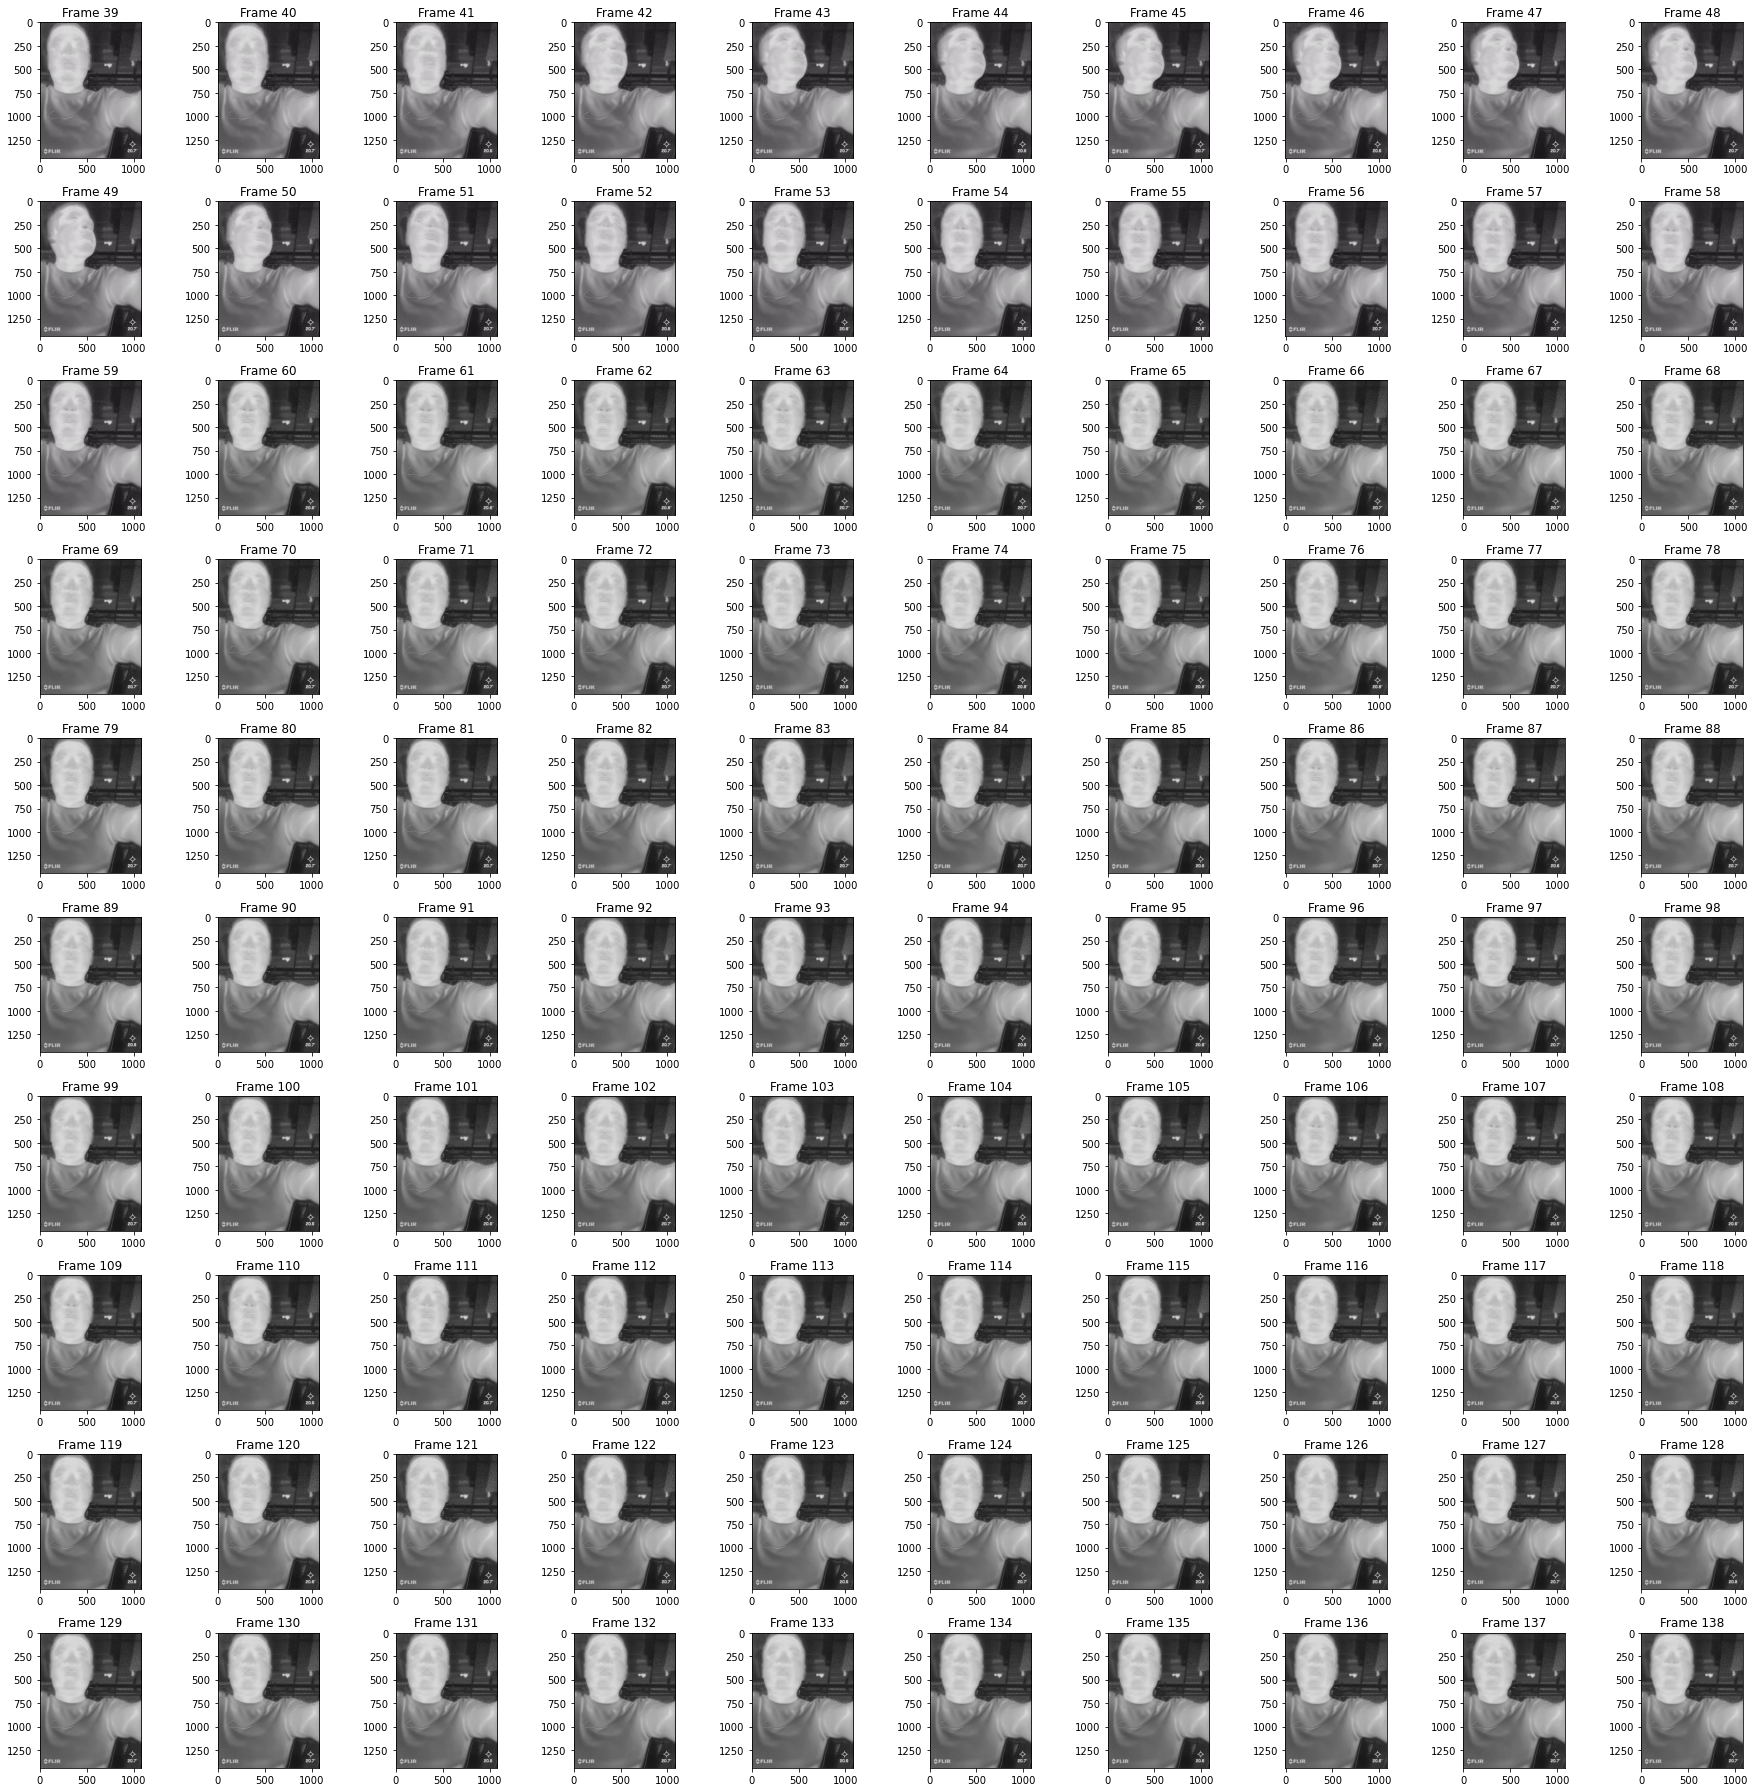

In [43]:
cap = cv2.VideoCapture(filenameWithPath)
# get the frame rate
fps = cap.get(cv2.CAP_PROP_FPS)

# get the total frame as per opencv2
print("Total number of frames = {}".format(cap.get(cv2.CAP_PROP_FRAME_COUNT)))

# number of frame to fast forward. These many frames will be skipped.
# these number is close to the timestamp of interest where the event has occured.
fastForwardFrame = round(frameElapsed)-5;

# keep a tab of the frame count
frameNumber = 0 if fastForwardFrame == 0 else fastForwardFrame


while fastForwardFrame:
    correct,frame = cap.read()
    fastForwardFrame-=1;


# Enter the number of frames to show, 
# ALERT: This number should be such that its square root is an integral
NosFrame = 100

# this variable will be reduced after each frame is processed
frameLeft = NosFrame
fig, ax = plt.subplots(10,10, figsize=(25,25))

# setting the initial indices of the plot
i=0;j=0;
correct = True


while frameLeft and correct:
    # read the first frame of the video
    correct,frame = cap.read()
    
    # change the channels so that we are matplotlib ready
    frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    
    ax[j,i].imshow(frame)
    ax[j,i].set_title("Frame {}".format(frameNumber))
    
    i+=1;
    if i==round(np.sqrt(NosFrame)):
        i=0
        j+=1
    frameLeft-=1; frameNumber+=1
fig.tight_layout()
cap.release()

In [10]:
# use the plot above to have an  idea which frame you want to overwrite
cap = cv2.VideoCapture(filenameWithPath)
# get the frame rate
fps = cap.get(cv2.CAP_PROP_FPS)

# new file name is old file name with _PP appended
newfileName = filenameWithPath.split('/')[-1].split('.')[0]+'_PP'

# path extracted from the full path above except the filename removed.
path = '/'.join(filenameWithPath.split('/')[:-1])+'/'

# printing the new name to confirm the filename
print(path+newfileName+'.MP4')

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# read the first frame of the 
correct,frame = cap.read()

print(frame_width,frame_height)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(path+newfileName, fourcc, fps, (frame_width,frame_height))

frameNo = 1;

# the starting and the ending frame number which are to be removed
iStFrame = 42
iEnFrame = 53

# the frame number with which to replace the 'bad' frames
iRpFrame = 40

while correct:
    
    if frameNo == iRpFrame:
        replacementFrame = frame
    
    if frameNo>=iStFrame and frameNo<=iEnFrame:
        cv2.imshow('Frame', replacementFrame)
        out.write(replacementFrame)
    else:
        cv2.imshow('Frame', frame)
        out.write(frame)
        

    correct,frame = cap.read()
    frameNo+=1;
    
    #key = cv2.waitKey(int((1/fps)*1000))    
    if (cv2.waitKey(int((1/fps)*1000)) & 0xFF) == ord('q'):
        cv2.destroyAllWindows()
        break
    
cap.release()
cv2.destroyAllWindows()

../../../Documents/thermal-project-data/cycling/20221005T092646_PP.MP4
1080 1440


## Run the cell below to makes frame (images) from video

In [10]:
# convert videos to frames and save it as an image
fps = 8.737238044062332

# This cell will find out the frame number corresponding to the timestamp of interest

# location fo the file
filenameWithPath = '../../../Documents/thermal-project-data/cycling/split/20221014T111320-clip3.MP4'

cap = cv2.VideoCapture(filenameWithPath)
# get the frame rate
fps = cap.get(cv2.CAP_PROP_FPS)

# get the total frame as per opencv2
frameLeft = cap.get(cv2.CAP_PROP_FRAME_COUNT)
print("Total number of frames = {}".format(frameLeft))

# number of frame to fast forward. These many frames will be skipped.
# these number is close to the timestamp of interest where the event has occured.
fastForwardFrame = 0;

# keep a tab of the frame count
frameNumber = 0 if fastForwardFrame == 0 else fastForwardFrame


while fastForwardFrame:
    correct,frame = cap.read()
    fastForwardFrame-=1;

    
correct = True
while frameLeft and correct:
    # read the first frame of the video
    correct,frame = cap.read()
    
    # change the channels so that we are matplotlib ready
    frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)   
    cv2.imwrite("frameImages/"+str(frameNumber)+".jpg", frame)
    frameLeft-=1;
    frameNumber+=1


Total number of frames = 525.0


In [2]:
S = 50
max_iters = 525//(S//2)-1

In [3]:
max_iters

20

In [25]:
count = 0
for s in range(50):
    count+=1
    print((4-1)*50//2+s)
print("Count = {}".format(count))

75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
Count = 50


In [26]:
import torch

In [27]:
N = 1
x = torch.ones((1, N), device=torch.device('cpu')) * 450.0
y = torch.ones((1, N), device=torch.device('cpu')) * 100.0
    

In [31]:
xy0 = torch.stack([x, y], dim=-1) # B, N, 2 => (1,1,2)

In [40]:
xy0

tensor([[[450., 100.]]])

In [44]:
traj_e = torch.zeros((1, 50, 2), dtype=torch.float32, device='cpu')

In [47]:
traj_e[:,0] = xy0[:,0]

In [48]:
traj_e

tensor([[[450., 100.],
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         [ 

In [4]:
global_step = 0
max_iters = 525//8
while global_step < max_iters:
    global_step+=1
    for s in range(8):
        print((global_step-1)*8+s)
    print("\n\n")

8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15





13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12


8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15





12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11





8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15


11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10


15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14


15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14


8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15





8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15





14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15





8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15




12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11


12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11


15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14


14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13


14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15




10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9


10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9


10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9


12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11


12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15





8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15





8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15




10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9


12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11


12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11


12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11


12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11


12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11


13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12





8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15


12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11


11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10


11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10


11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10


14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13


14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13


15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14


9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8


9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8


9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8


15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14


15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14


15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14
15



8
9
10
11
12
13
14


KeyboardInterrupt: 